### Начинаем с импорта необходимых модулей

In [3]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

### Считываем csv файлы с помощью Pandas (указываем путь до файла на Google drive)

In [4]:
questions = pd.read_csv("drive/MyDrive/Colab Notebooks/questions.csv", sep=',')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [5]:
lectures = pd.read_csv('drive/MyDrive/Colab Notebooks/lectures.csv', sep=',')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


### Для большого файла указываем типы данных столбцов, считываение производим с помощью Dask, так как с помощью Pandas происходит переполнение оперативной памяти

In [6]:
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}

train_data = dd.read_csv("drive/MyDrive/Colab Notebooks/train.csv", dtype=dtypes).compute()

### Произведем анализ полученных DataFrames:
### 1. questions

In [7]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


**DataFrame состоит из 13523 строк, 5 столбцов, отсутстсвует одно значение "tags"**

In [8]:
questions.describe(include='all')

,question_id,bundle_id,correct_answer,part,tags
count,13523.00000,13523.000000,13523.000000,13523.000000,13522
unique,NaN,NaN,NaN,NaN,1519
top,NaN,NaN,NaN,NaN,8
freq,NaN,NaN,NaN,NaN,738
mean,6761.00000,6760.510907,1.455298,4.264956,NaN
std,3903.89818,3903.857783,1.149707,1.652553,NaN
min,0.00000,0.000000,0.000000,1.000000,NaN
25%,3380.50000,3379.500000,0.000000,3.000000,NaN
50%,6761.00000,6761.000000,1.000000,5.000000,NaN
75%,10141.50000,10140.000000,3.000000,5.000000,NaN


**Все вопросы относятся к разным part (всего их 7), найдем распределние всех вопросов по part**

In [9]:
questions.part.value_counts()

,count
part,
5,5511
2,1647
3,1562
4,1439
6,1212
7,1160
1,992


**Отобразим это на диаграмме**

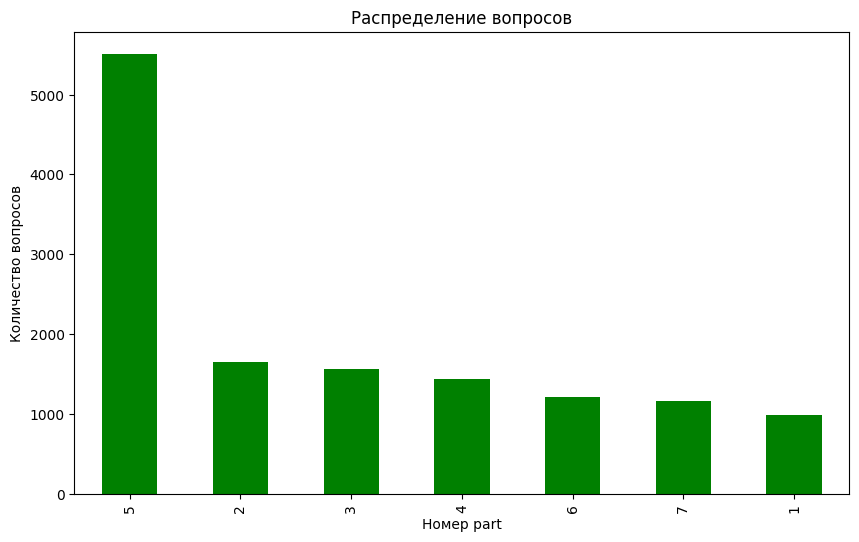

In [10]:
# Построим диаграмму
plt.figure(figsize=(10, 6))
questions.part.value_counts().plot(kind='bar', color='green')
plt.title('Раcпределение вопросов')
plt.xlabel('Номер part')
plt.ylabel('Количество вопросов')
plt.show()

### 2. lectures

In [11]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


**DataFrame состоит из 418 строк, 4 столбцов, нет ниодного пропущенного значения**

In [12]:
lectures.describe(include='all')

,lecture_id,tag,part,type_of
count,418.000000,418.000000,418.000000,418
unique,NaN,NaN,NaN,4
top,NaN,NaN,NaN,concept
freq,NaN,NaN,NaN,222
mean,16983.401914,94.480861,4.267943,NaN
std,9426.164660,53.586487,1.872424,NaN
min,89.000000,0.000000,1.000000,NaN
25%,9026.250000,50.250000,2.000000,NaN
50%,17161.500000,94.500000,5.000000,NaN
75%,24906.250000,140.000000,6.000000,NaN


**Все лекции относятся к разным part (всего их 7), найдем распределние всех вопросов по part**

In [13]:
lectures.part.value_counts()

,count
part,
5,143
6,83
2,56
1,54
7,32
4,31
3,19


**Отобразим это на диаграмме**

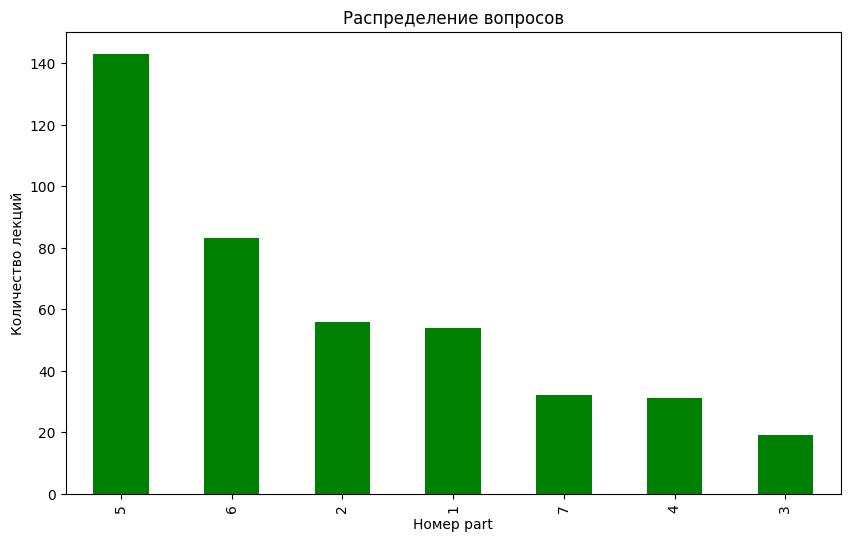

In [13]:
# Построим диаграмму
plt.figure(figsize=(10, 6))
lectures.part.value_counts().plot(kind='bar', color='green')
plt.title('Раcпределение вопросов')
plt.xlabel('Номер part')
plt.ylabel('Количество лекций')
plt.show()

### 3. train

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101230332 entries, 0 to 1080610
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 boolean
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 4.0 GB


**DataFrame состоит из 101230332 строк, 10 столбцов**

In [15]:
train_data.describe(include='all')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,101230332,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07,100837826
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,99271300,NaN,NaN,NaN,NaN,89685560
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,NaN,9.040624e+02,1.376123e+00,6.251644e-01,2.542384e+04,NaN
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,NaN,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04,NaN
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,NaN,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,NaN
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,NaN,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04,NaN
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,NaN,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04,NaN
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,NaN,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04,NaN


In [42]:
mask = (train_data['user_id'] != False) | (train_data['user_id'] != True)

In [ ]:
train_data[mask]

**Произведем анализ записей из таблицы и узнаем распределение ответов на вопросы и обращения студентов к лекциям**

In [17]:
train_data['content_type_id'].value_counts(normalize=True)

,proportion
content_type_id,
False,0.980648
True,0.019352


**Отобразим это на диаграмме**

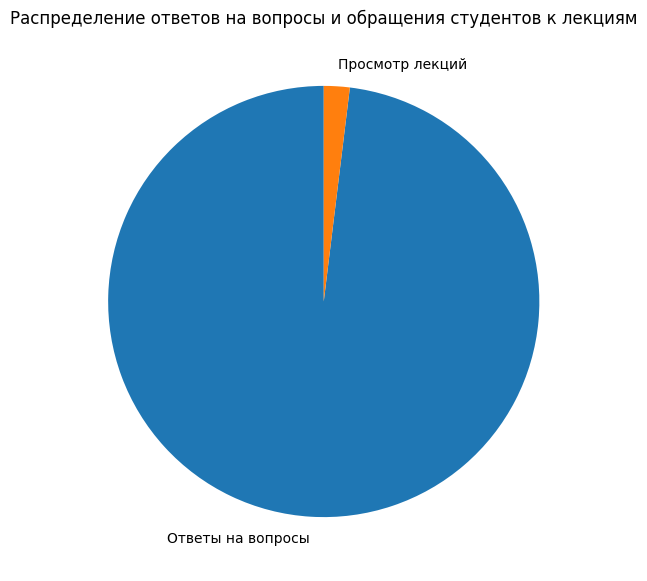

In [21]:
# Построим диаграмму
plt.figure(figsize=(10, 7))
train_data['content_type_id'].value_counts(normalize=True).plot(kind='pie', autopct=None, startangle=90, color='green', labels = ['Ответы на вопросы', 'Просмотр лекций'])
plt.xlabel('')
plt.ylabel('')
plt.title('Распределение ответов на вопросы и обращения студентов к лекциям')

plt.show()

In [22]:
train_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [31]:
mask = train_data['content_type_id'] == True
train_data[mask].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1959032 entries, 89 to 1080501
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 boolean
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 78.5 MB
